In [21]:
# Import the modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [22]:
# Import data for homeless sheletered population and homeless total population in two csv files
sheltered_data_to_load = Path("2021-AHAR-Part-1_HomelessSheltered.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_sheltered = pd.read_csv(sheltered_data_to_load)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged = pd.merge(homeless_sheltered, homeless_population, how="outer", on=["State", "State"])
homeless_merged.head()

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,1626.0,1165.0,461.0,55.0,3752,7.4,539,1270,2482,169,308
1,Alaska,1797.0,1295.0,502.0,195.0,2320,31.7,576,560,1760,186,134
2,Arizona,5460.0,3304.0,2165.0,249.0,13553,18.6,2476,2846,10707,917,857
3,Arkansas,1470.0,1204.0,266.0,129.0,2459,8.1,376,328,2131,251,92
4,California,51429.0,32910.0,18519.0,2526.0,171521,43.7,57760,25538,145983,9590,10395


In [23]:
# Rename columns to be more intelligible to readers

homeless_merged = homeless_merged.rename(columns={'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged.head()

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,1626.0,1165.0,461.0,55.0,3752,7.4,539,1270,2482,169,308
1,Alaska,1797.0,1295.0,502.0,195.0,2320,31.7,576,560,1760,186,134
2,Arizona,5460.0,3304.0,2165.0,249.0,13553,18.6,2476,2846,10707,917,857
3,Arkansas,1470.0,1204.0,266.0,129.0,2459,8.1,376,328,2131,251,92
4,California,51429.0,32910.0,18519.0,2526.0,171521,43.7,57760,25538,145983,9590,10395


In [24]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged['ChronicPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['ChronicallyHomeless'] / homeless_merged['TotalPopulation']

# Create ChronicPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_merged['ShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Sheltered Homeless Population'] / homeless_merged['TotalPopulation']

# Create IndvShelteredPer10k column to calculate sheltered individuals per 10,000 residents

homeless_merged['IndvShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Individuals Sheltered'] / homeless_merged['TotalPopulation']

# Create FamsShelteredPer10k column to calculate sheltered families per 10,000 residents

homeless_merged['FamsShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Families Sheltered'] / homeless_merged['TotalPopulation']

# Create YouthShelteredPer10k column to calculate unaccompanied youth sheltered per 10,000 residents

homeless_merged['YouthShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Unaccompanied Youth Sheltered'] / homeless_merged['TotalPopulation']

homeless_merged.head()

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,ChronicPer10k,ShelteredPer10k,IndvShelteredPer10k,FamsShelteredPer10k,YouthShelteredPer10k
0,Alabama,1626.0,1165.0,461.0,55.0,3752,7.4,539,1270,2482,169,308,1.063060,3.206930,2.297708,0.909222,0.108475
1,Alaska,1797.0,1295.0,502.0,195.0,2320,31.7,576,560,1760,186,134,7.870345,24.553836,17.694612,6.859224,2.664440
2,Arizona,5460.0,3304.0,2165.0,249.0,13553,18.6,2476,2846,10707,917,857,3.398037,7.493249,4.534376,2.971224,0.341725
3,Arkansas,1470.0,1204.0,266.0,129.0,2459,8.1,376,328,2131,251,92,1.238552,4.842212,3.966002,0.876210,0.424929
4,California,51429.0,32910.0,18519.0,2526.0,171521,43.7,57760,25538,145983,9590,10395,14.716052,13.103045,8.384787,4.718258,0.643573


In [25]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_merged.loc[:, ['State','Sheltered Homeless Population', 'TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k','IndvShelteredPer10k','FamsShelteredPer10k','YouthShelteredPer10k']]
homeless_reduced.head()

,State,Sheltered Homeless Population,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k,IndvShelteredPer10k,FamsShelteredPer10k,YouthShelteredPer10k
0,Alabama,1626.0,3752,7.4,539,1.063060,3.206930,2.297708,0.909222,0.108475
1,Alaska,1797.0,2320,31.7,576,7.870345,24.553836,17.694612,6.859224,2.664440
2,Arizona,5460.0,13553,18.6,2476,3.398037,7.493249,4.534376,2.971224,0.341725
3,Arkansas,1470.0,2459,8.1,376,1.238552,4.842212,3.966002,0.876210,0.424929
4,California,51429.0,171521,43.7,57760,14.716052,13.103045,8.384787,4.718258,0.643573


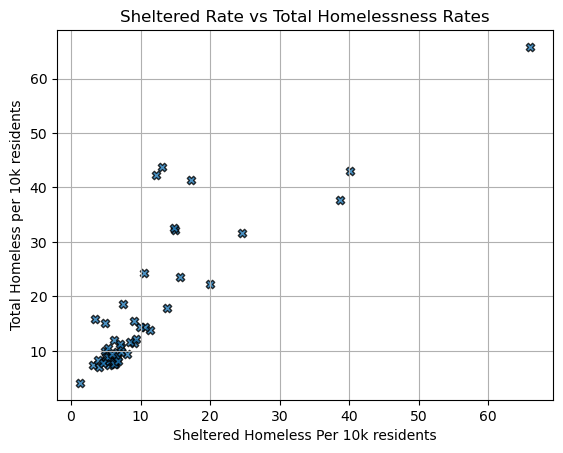

In [26]:
# Create scatter plot showing relationship scores between sheltered homeless population rate 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["ShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="X", 
    alpha=0.8,

)

# Augment
plt.title("Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

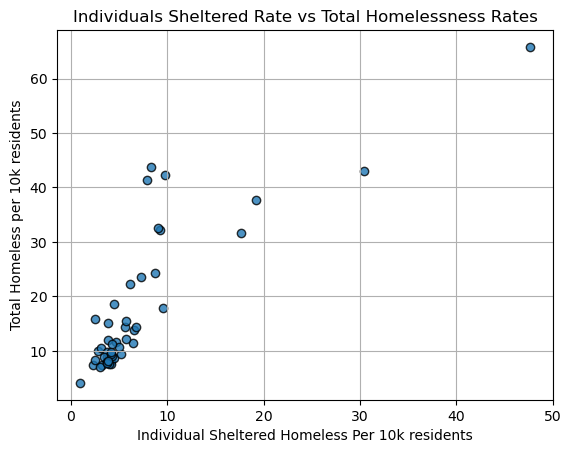

In [12]:
# Create scatter plot showing relationship scores between individual sheltered homeless population rate 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["IndvShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,

)

# Augment
plt.title("Individuals Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Individual Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

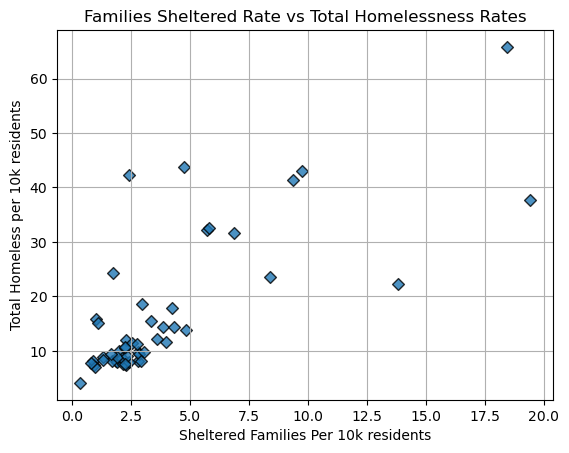

In [27]:
# Create scatter plot showing relationship scores between rate of families sheltered 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["FamsShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Families Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Sheltered Families Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

In [28]:
# Regression analysis for each of the pairs below.

# Define a function
def plot_linear_regression(x_values, y_values, x_axis, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r-squared value is: 0.7151465288187515
The r value is: 0.8456633661326187
The p value is: 5.785291209689986e-15


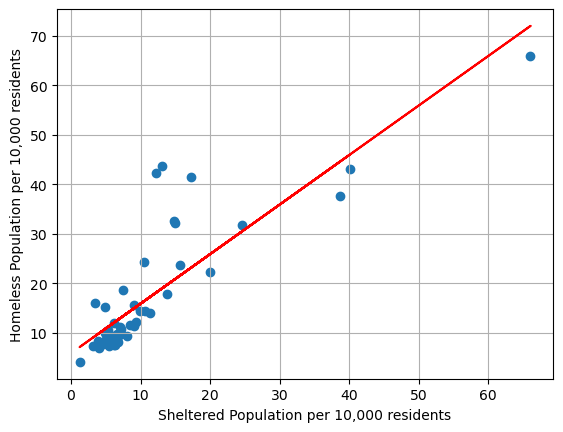

In [29]:
# Linear regression comparing total homeless rate by state as a function of sheltered homeless rate by state

x_values = homeless_reduced["ShelteredPer10k"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Sheltered Population per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

The r-squared value is: 0.6793874926254426
The r value is: 0.8242496543071417
The p value is: 1.0743740428955462e-13


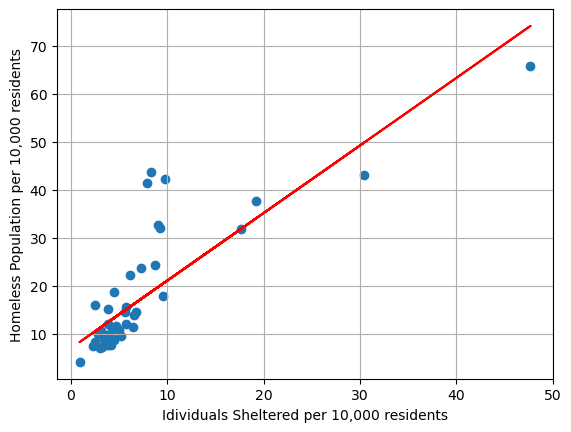

In [30]:
# Linear regression comparing total homeless rate by state as a function of rate of indididuals homeless sheltered by state

x_values = homeless_reduced["IndvShelteredPer10k"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Idividuals Sheltered per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

The r-squared value is: 0.5689601558601611
The r value is: 0.7542944755598845
The p value is: 1.6463624832990666e-10


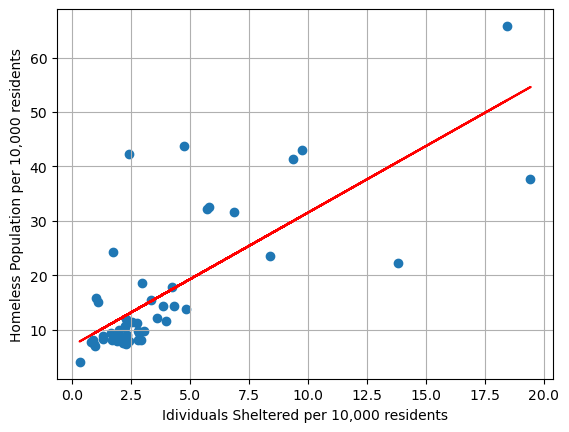

In [31]:
# Linear regression comparing total homeless rate to rate of sheltered families by state

x_values = homeless_reduced["FamsShelteredPer10k"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Idividuals Sheltered per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))